In [ ]:
# Regression model to predict the rating(Rating) of an application

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Loading CSV into DataFrame called df
df = pd.read_csv('reviews.csv')

# Quick looking at the dataframe using head()
df.head()

,Category,No Of Reviews,No Of Installs,Size,Price,Days since Last Update,Rating
0,games,510,1437,318.0,0.00,81,1.94
1,productivity,155,1547,204.0,-0.50,72,2.07
2,books,273,1162,271.0,0.81,69,1.34
3,games,110,1104,NaN,0.00,82,1.48
4,games,261,1403,224.0,1.01,98,2.80


In [4]:
# Checking for the missing values in DataFrame df
df.isnull().sum()

Category                   0
No Of Reviews              0
No Of Installs             0
Size                      28
Price                      0
Days since Last Update     0
Rating                     0
dtype: int64

,No Of Reviews,No Of Installs,Size,Price,Days since Last Update,Rating
count,500.000000,500.00000,472.000000,500.000000,500.000000,500.000000
mean,426.578000,1456.22200,247.870763,0.772200,83.274000,2.462260
std,366.600332,506.51664,95.105050,0.752114,14.960433,0.840859
min,0.000000,23.00000,8.000000,-0.500000,-80.000000,0.050000
25%,113.750000,1072.50000,184.000000,0.000000,76.000000,1.907500
50%,273.000000,1447.50000,249.000000,0.645000,84.000000,2.480000
75%,716.250000,1783.75000,312.250000,1.270000,92.000000,3.020000
max,1552.000000,2880.00000,494.000000,3.380000,117.000000,4.970000


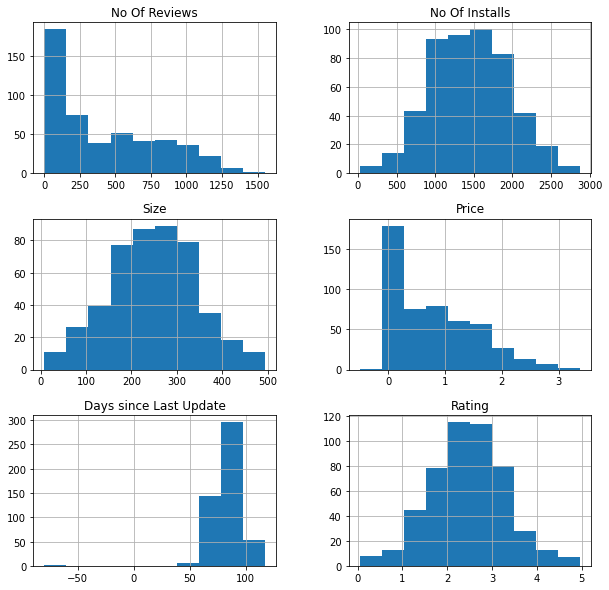

In [5]:
# Plotting histogram for each numerical column in DataFrame df
df.hist(figsize = (10,10))

# Getting some of the descriptive statistics
df.describe()

In [6]:
cond1 = df['Price'] < 0
df[cond1]

,Category,No Of Reviews,No Of Installs,Size,Price,Days since Last Update,Rating
1,productivity,155,1547,204.0,-0.5,72,2.07


In [7]:
cond2 = df['Days since Last Update'] < 0
df[cond2]

,Category,No Of Reviews,No Of Installs,Size,Price,Days since Last Update,Rating
11,productivity,201,2006,NaN,0.00,-68,1.91
88,games,59,587,335.0,1.58,-80,2.08


In [8]:
cond1 = df['Price'] >= 0
cond2 = df['Days since Last Update'] >=0
df = df[cond1 & cond2]
df.shape

(497, 7)

In [9]:
df.describe()

,No Of Reviews,No Of Installs,Size,Price,Days since Last Update,Rating
count,497.000000,497.000000,470.000000,497.000000,497.000000,497.00000
mean,428.317907,1456.682093,247.778723,0.774688,83.929577,2.46493
std,366.990397,505.926262,95.201066,0.750540,11.162341,0.84267
min,0.000000,23.000000,8.000000,0.000000,50.000000,0.05000
25%,114.000000,1073.000000,184.000000,0.000000,76.000000,1.90000
50%,274.000000,1446.000000,249.000000,0.650000,84.000000,2.48000
75%,717.000000,1783.000000,312.000000,1.270000,92.000000,3.02000
max,1552.000000,2880.000000,494.000000,3.380000,117.000000,4.97000


In [10]:
# splitting dataset into training and test subsets

from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
# Checking the correlation coefficient among the features.
# For our project correlation coefficient not be greater than 0.7 or smaller than 0.7

X_train.corr()

,No Of Reviews,No Of Installs,Size,Price,Days since Last Update
No Of Reviews,1.000000,0.514130,-0.018121,-0.086976,-0.078577
No Of Installs,0.514130,1.000000,-0.004516,-0.018700,-0.054035
Size,-0.018121,-0.004516,1.000000,-0.038070,-0.002414
Price,-0.086976,-0.018700,-0.038070,1.000000,-0.031706
Days since Last Update,-0.078577,-0.054035,-0.002414,-0.031706,1.000000


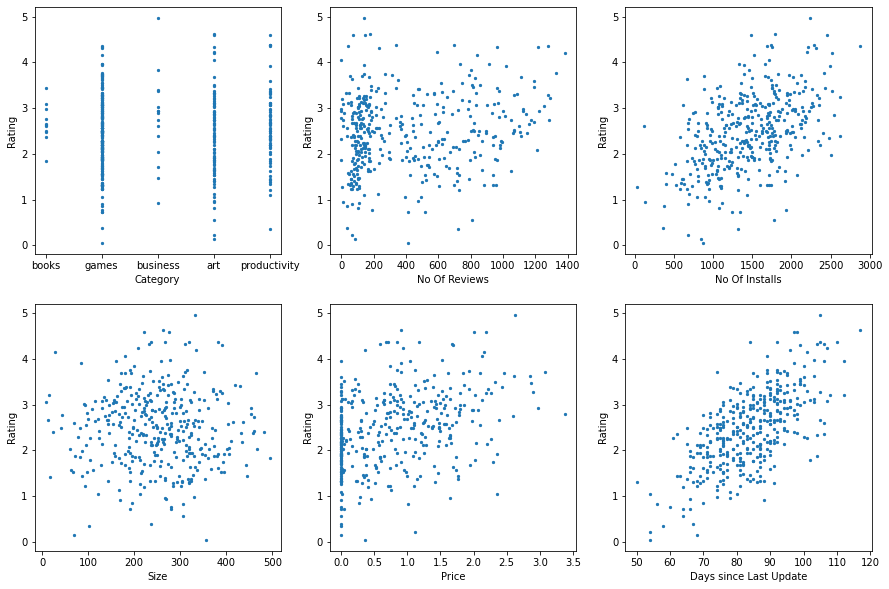

In [12]:
columns = ['Category', 'No Of Reviews', 'No Of Installs', 'Size', 'Price', 'Days since Last Update']
i = 0
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for row in range(0,2):
    for col in range(0,3):
        axes[row,col].scatter(X_train[columns[i]], y_train, s = 5)
        axes[row,col].set_xlabel(columns[i])
        axes[row,col].set_ylabel('Rating')
        i += 1

# Data Preprocessing

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
num_col = ['No Of Reviews', 'No Of Installs', 'Size', 'Price',
'Days since Last Update']
cat_col = ['Category']
imp = SimpleImputer(strategy='mean')
tf_num = imp.fit_transform(X_train[num_col])
scaler = StandardScaler()
tf_num = scaler.fit_transform(tf_num)
ohe = OneHotEncoder(sparse = False, drop = 'first')
tf_cat = ohe.fit_transform(X_train[cat_col])
X_train_transformed = np.concatenate((tf_num, tf_cat), axis=1)
print(X_train_transformed[0])

[-1.14922     1.1215984  -1.13561632  0.0732169   0.01224327  1.
  0.          0.          0.        ]


# Train the model

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_transformed, y_train)
print(model.coef_)
print(model.intercept_)

[-0.01263761  0.44527099  0.00512994  0.33109219  0.57813034  0.15265019
 -0.09387284  0.01393827  0.09654561]
2.4437510828137157


# Evaluate the model

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
y_train_pred = model.predict(X_train_transformed)
rmse = mean_squared_error(y_train, y_train_pred, squared = False)
r2 = r2_score(y_train, y_train_pred)
print(rmse)
print(r2)

test_tf_num = imp.transform(X_test[num_col])
test_tf_num = scaler.transform(test_tf_num)
test_tf_cat = ohe.transform(X_test[cat_col])
X_test_transformed = np.concatenate((test_tf_num, test_tf_cat),
axis=1)
y_test_pred = model.predict(X_test_transformed)
rmse = mean_squared_error(y_test, y_test_pred, squared = False)
r2 = r2_score(y_test, y_test_pred)
print(rmse)
print(r2)

0.313351772053805
0.8579549928483164
0.28455529875001995
0.8958679954075467


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
num_preprocessing = Pipeline(
[('imp', SimpleImputer(strategy='mean')),
('scaler', StandardScaler())])
full_preprocessing = ColumnTransformer(
[('num', num_preprocessing, num_col),
('cat', OneHotEncoder(sparse=False, drop='first'), cat_col)])
final_pipeline = Pipeline(
[('pre', full_preprocessing),
('model', LinearRegression())])

In [18]:
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['No Of Reviews',
                                                   'No Of Installs', 'Size',
                                                   'Price',
                                                   'Days since Last Update']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Category'])])),
                ('model', Lin

In [20]:
y_train_pred = final_pipeline.predict(X_train)
rmse = mean_squared_error(y_train, y_train_pred, squared=False)
r2 = r2_score(y_train, y_train_pred)
print(rmse)
print(r2)

y_test_pred = final_pipeline.predict(X_test)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)
print(rmse)
print(r2)

0.313351772053805
0.8579549928483164
0.28455529875001995
0.8958679954075467


In [21]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(final_pipeline, X_train, y_train, cv=4,
scoring="neg_root_mean_squared_error")
neg_rmse_cv = scores.mean()
print(-neg_rmse_cv)
scores = cross_val_score(final_pipeline, X_train, y_train, cv=4,
scoring="r2")
r2_cv = scores.mean()
print(r2_cv)

0.32508192142610537
0.8409908098104693
